In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.drop('Loan_ID',axis=1,inplace=True)

In [5]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Handling Categorical Values
for i in data.select_dtypes(include='object').columns:
    data[i] = data[i].fillna(data[i].mode()[0])

In [7]:
data.select_dtypes(include='number').isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [8]:
# Handling Numerical Values
for i in data.select_dtypes(include='number').columns:
    data[i] = data[i].fillna(data[i].mean())

In [9]:
# Map categorical columns manually
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].map({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

,copy,True
,with_mean,True
,with_std,True


In [12]:
scaler.transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

array([[ 0.07299082, -0.55448733,  0.        ,  0.27985054],
       [-0.13441195, -0.03873155, -0.21927331,  0.27985054],
       [-0.39374734, -0.55448733, -0.957641  ,  0.27985054],
       ...,
       [ 0.43717437, -0.47240418,  1.26937121,  0.27985054],
       [ 0.35706382, -0.55448733,  0.4833669 ,  0.27985054],
       [-0.13441195, -0.55448733, -0.15972753,  0.27985054]],
      shape=(614, 4))

In [13]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]= pd.DataFrame(scaler.transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]))

In [14]:
data['Dependents']=data['Dependents'].replace('3+','4')

In [15]:
data['Dependents']=data['Dependents'].astype('int64')

In [72]:
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [73]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
from imblearn.over_sampling import RandomOverSampler

# Assume X is your features and y is your target variable
ros = RandomOverSampler(random_state=42)
X_rs, y_rs = ros.fit_resample(X, y)


In [75]:
y_rs.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test=train_test_split(X_rs,y_rs, test_size=0.2, random_state=42)

In [78]:
print('X_train',X_train.shape)   # The part of your data used to train the model (input data like income, loan amount, etc.)
print('X_test',X_test.shape)     # The part of your data used to test the model 
print('y_train',y_train.shape)   # Target/output values used during training
print('y_test',y_test.shape)     # Target/output values used to evaluate accuracy

X_train (675, 11)
X_test (169, 11)
y_train (675,)
y_test (169,)


In [79]:
!pip install xgboost

In [80]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [81]:
model.score(X_test,y_test)*100

80.4733727810651

In [82]:
y_pred = model.predict(X_test)   #this is the array of predicted loan approval statuses (1 = approved, 0 = not approved) for your X_test data.
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1])

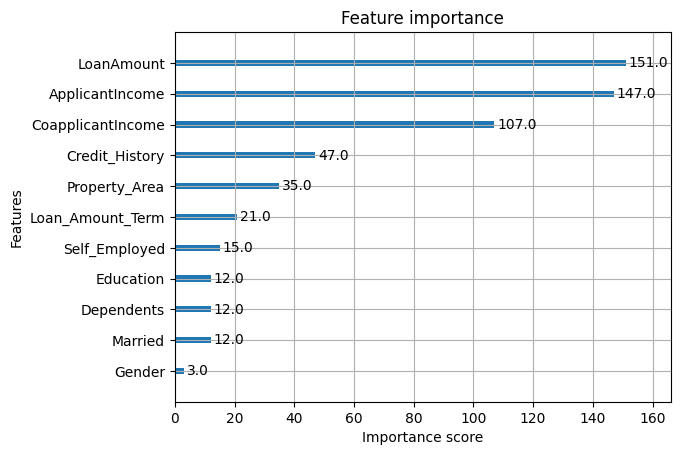

In [83]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [84]:
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score

In [123]:
cf=confusion_matrix(y_test,y_pred)
print(cf)

[[67 27]
 [ 6 69]]


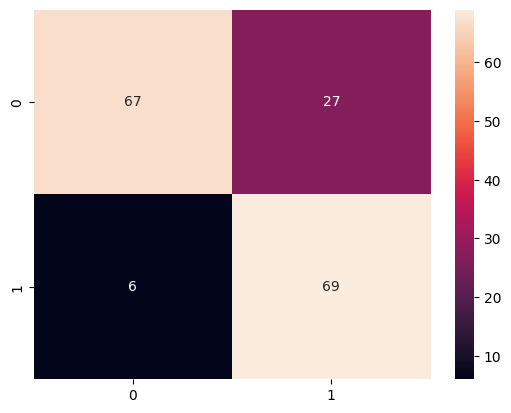

In [120]:
sns.heatmap(cf,annot=True)  # annot adds the actual numbers inside the heatmap cells.
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.coef_[0], index=X_train.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()


In [87]:
precision_score(y_test,y_pred)*100

71.875

In [88]:
recall_score(y_test,y_pred)*100

92.0

In [89]:
f1_score(y_test,y_pred)*100

80.7017543859649

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'penalty': ['l1', 'l2'],                # Type of penalty
    'solver': ['liblinear', 'saga']         # Solver compatible with both L1 and L2
}

# Create model
logreg = LogisticRegression(max_iter=1000)

# Grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Best score
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Score: 0.7348148148148148
Test Accuracy: 0.7100591715976331


In [91]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scalernew.pkl')



['scalernew.pkl']

In [92]:
# Save the best model (from GridSearchCV)
joblib.dump(best_model, 'logistic_modelnew.pkl')

['logistic_modelnew.pkl']

In [117]:
# Sample user input from frontend (raw)
input_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 2400,
    'CoapplicantIncome':1000,
    'LoanAmount': 75,
    'Loan_Amount_Term': 360,
    'Credit_History':1,
    'Property_Area': 'Urban',
    
}

# Categorical mapping
gender_map = {'Male': 1, 'Female': 0}
married_map = {'Yes': 1, 'No': 0}
dependents_map = {'0': 0, '1': 1, '2': 2, '3': 3, '3+': 4}
education_map = {'Graduate': 1, 'Not Graduate': 0}
self_employed_map = {'Yes': 1, 'No': 0}
property_map = {'Urban': 2, 'Rural': 0, 'Semiurban': 1}


# Apply mapping
input_data['Gender'] = gender_map[input_data['Gender']]
input_data['Married'] = married_map[input_data['Married']]
input_data['Dependents'] = dependents_map[input_data['Dependents']]
input_data['Education'] = education_map[input_data['Education']]
input_data['Self_Employed'] = self_employed_map[input_data['Self_Employed']]
input_data['Property_Area'] = property_map[input_data['Property_Area']]



In [118]:
# Step 4: Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Step 5: Scale the numerical features
input_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = scaler.transform(
    input_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
)

# Step 6: Predict
prediction = model.predict(input_df)[0]
print("Prediction:", "Approved" if prediction == 1 else "Rejected")

Prediction: Approved
